In [ ]:
Data source -  https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/notebook

In [2]:
import warnings
warnings.filterwarnings('ignore')


# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
advertising = pd.read_csv("advertising.csv")

In [ ]:
Data Inspection

In [5]:
advertising.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
advertising.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [8]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
advertising.shape

(200, 4)

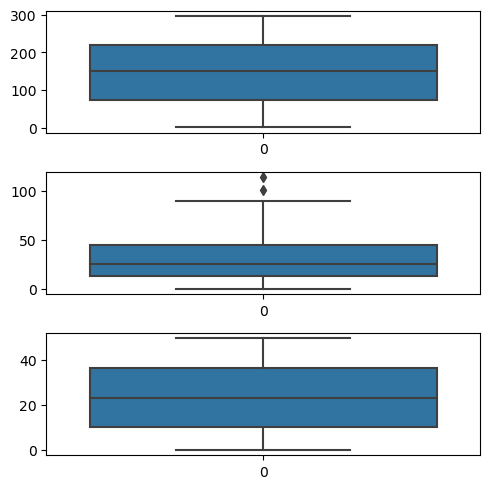

In [11]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

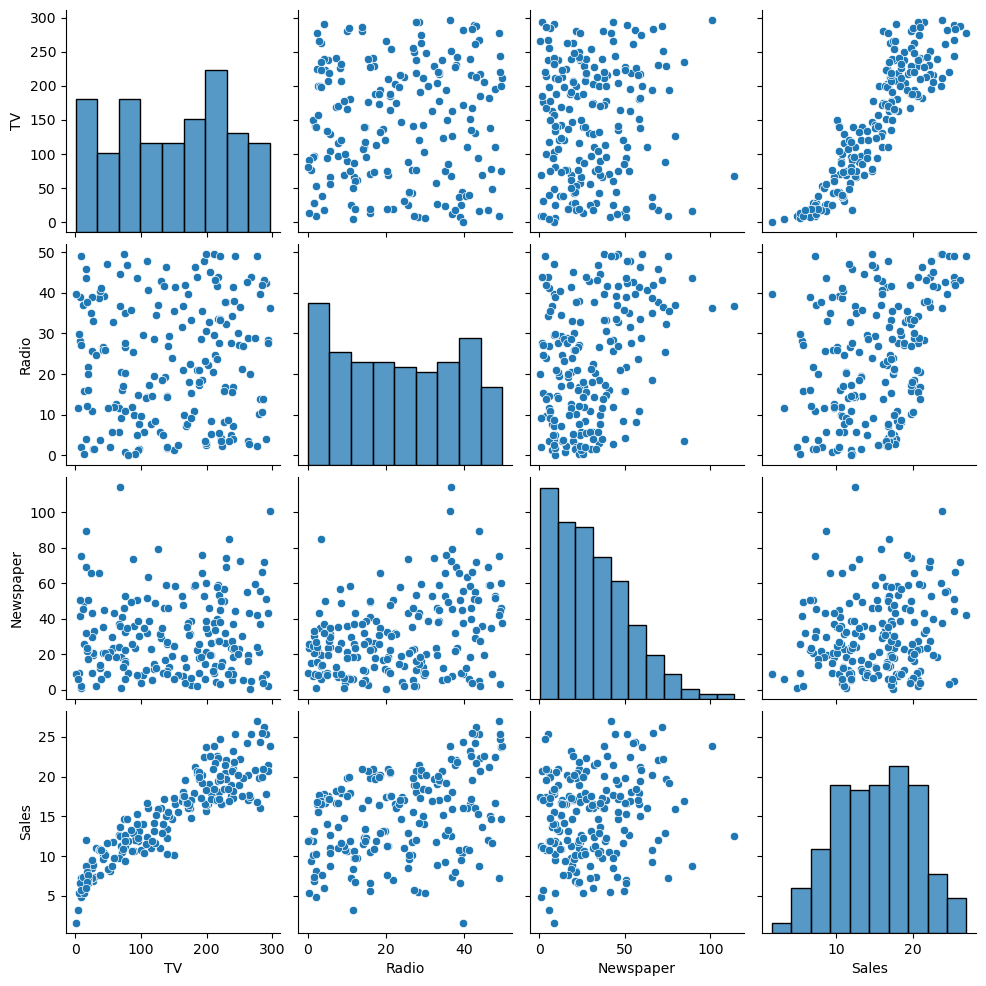

In [12]:
sns.pairplot(advertising, vars=['TV', 'Radio', 'Newspaper', 'Sales'])
plt.show()

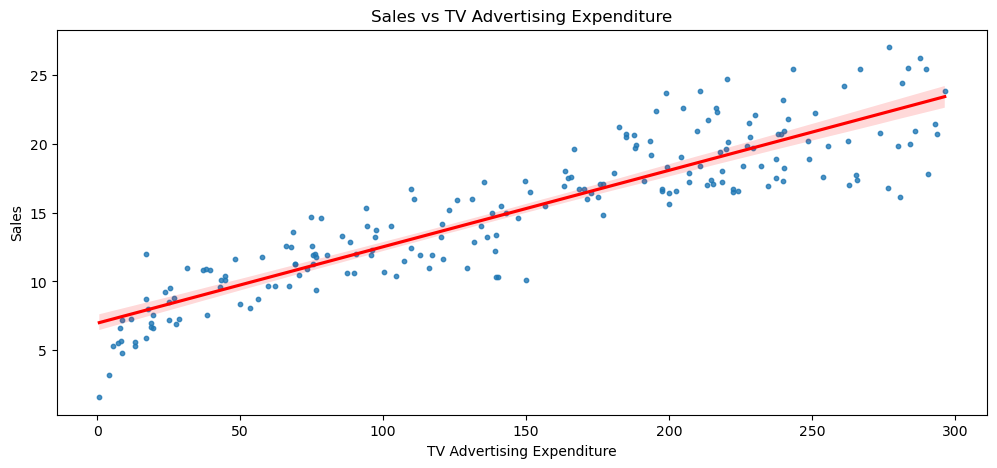

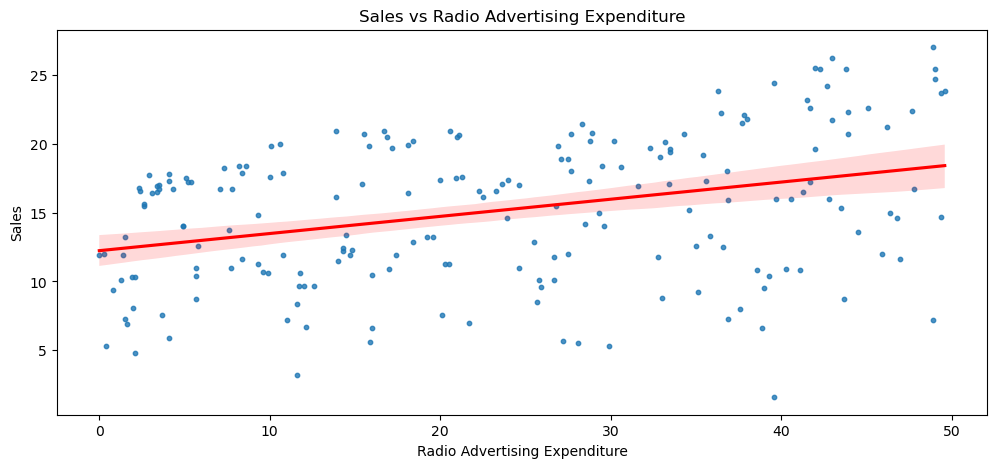

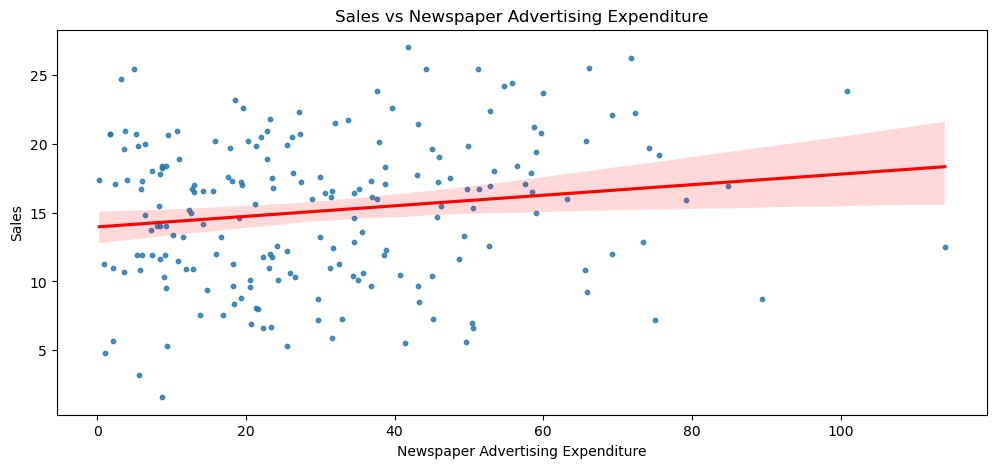

In [13]:


# Scatter plot for Sales vs TV with linear regression line
plt.figure(figsize=(12, 5))
sns.regplot(x='TV', y='Sales', data=advertising, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Sales vs TV Advertising Expenditure')
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.show()

# Scatter plot for Sales vs Radio with linear regression line
plt.figure(figsize=(12, 5))
sns.regplot(x='Radio', y='Sales', data=advertising, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Sales vs Radio Advertising Expenditure')
plt.xlabel('Radio Advertising Expenditure')
plt.ylabel('Sales')
plt.show()

# Scatter plot for Sales vs Newspaper with linear regression line
plt.figure(figsize=(12, 5))
sns.regplot(x='Newspaper', y='Sales', data=advertising, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Sales vs Newspaper Advertising Expenditure')
plt.xlabel('Newspaper Advertising Expenditure')
plt.ylabel('Sales')
plt.show()

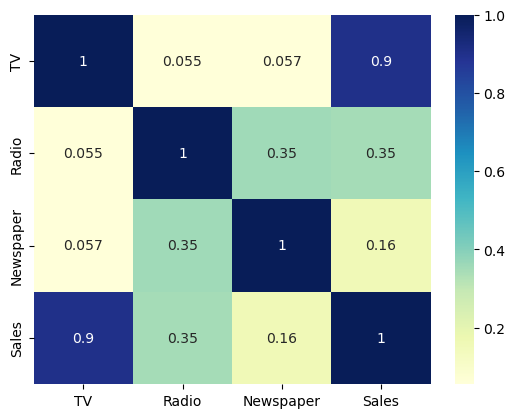

In [14]:
# Let's see the correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [15]:
X = advertising['TV']
y = advertising['Sales']

In [16]:
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [17]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 123)

In [25]:
X.shape

(200, 1)

In [26]:
y.shape

(200,)

In [27]:
X_train.shape

(140,)

In [28]:
X_test.shape

(60,)

In [29]:
y_train.shape

(140,)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select the feature (independent variable) and the target (dependent variable)
X = advertising['TV'].values.reshape(-1, 1)
y = advertising['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 123)
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 5.7329278499817535
R-squared (R2) Score: 0.7895382693709685


In [46]:
y_pred[1]

11.36658464755941

In [47]:
X_test[1]

array([80.2])

In [51]:
(0.055529*80.2)+6.913154

11.3665798

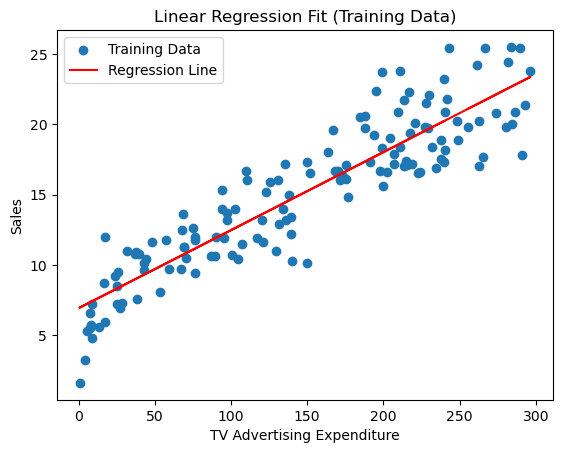

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



# Predict y values for the training and testing data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Create a scatter plot for the training data
plt.scatter(X_train, y_train, label='Training Data')

# Plot the regression line for the training data
plt.plot(X_train, y_pred_train, 'r', label='Regression Line')

# Labeling the axes and title
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Linear Regression Fit (Training Data)')
plt.legend()
plt.show()

In [43]:
import statsmodels.api as sm

# Add a constant (intercept) to the predictor variable
X_train = sm.add_constant(X_train)

# Fit the OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y_train, X_train).fit()
ols_model.params


# Get the summary of the regression
#print(ols_model.summary())

const    6.913154
x1       0.055529
dtype: float64

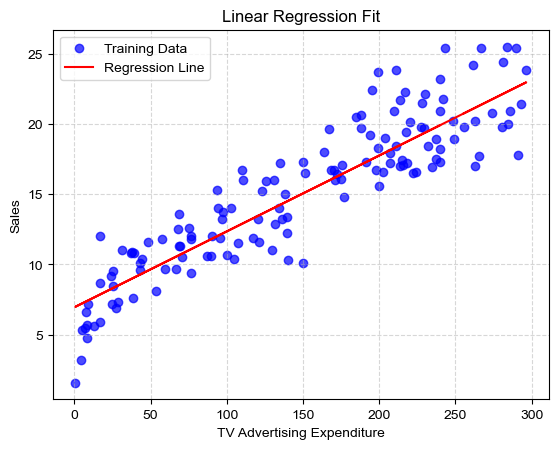

In [40]:
import matplotlib.pyplot as plt

# Create a scatter plot for the training data
plt.scatter(X_train[:, 1], y_train, label='Training Data', color='blue', marker='o', alpha=0.7)

# Calculate the predictions using the equation
y_pred_train = 6.948 + 0.054 * X_train[:, 1]

# Plot the regression line
plt.plot(X_train[:, 1], y_pred_train, 'r', label='Regression Line')

# Add labels and title
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Linear Regression Fit')

# Display the legend
plt.legend()

# Show grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Customize plot style
plt.style.use('seaborn')

# Show the plot
plt.show()